In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-06-27  117.839996  119.894997  116.910004  119.010002  119.010002   
247 2023-06-28  117.959999  121.269997  117.599998  121.080002  121.080002   
248 2023-06-29  120.089996  120.910004  119.209999  120.010002  120.010002   
249 2023-06-30  121.099998  122.029999  120.879997  120.970001  120.970001   
250 2023-07-03  120.320000  121.019997  119.705002  120.559998  120.559998   

       Volume  
246  27221700  
247  19753100  
248  18517500  
249  23865800  
250  13888300  


In [2]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-07-05  113.887001
1 2022-07-06  115.213501
2 2022-07-07  119.306000
3 2022-07-08  120.168503
4 2022-07-11  116.522499


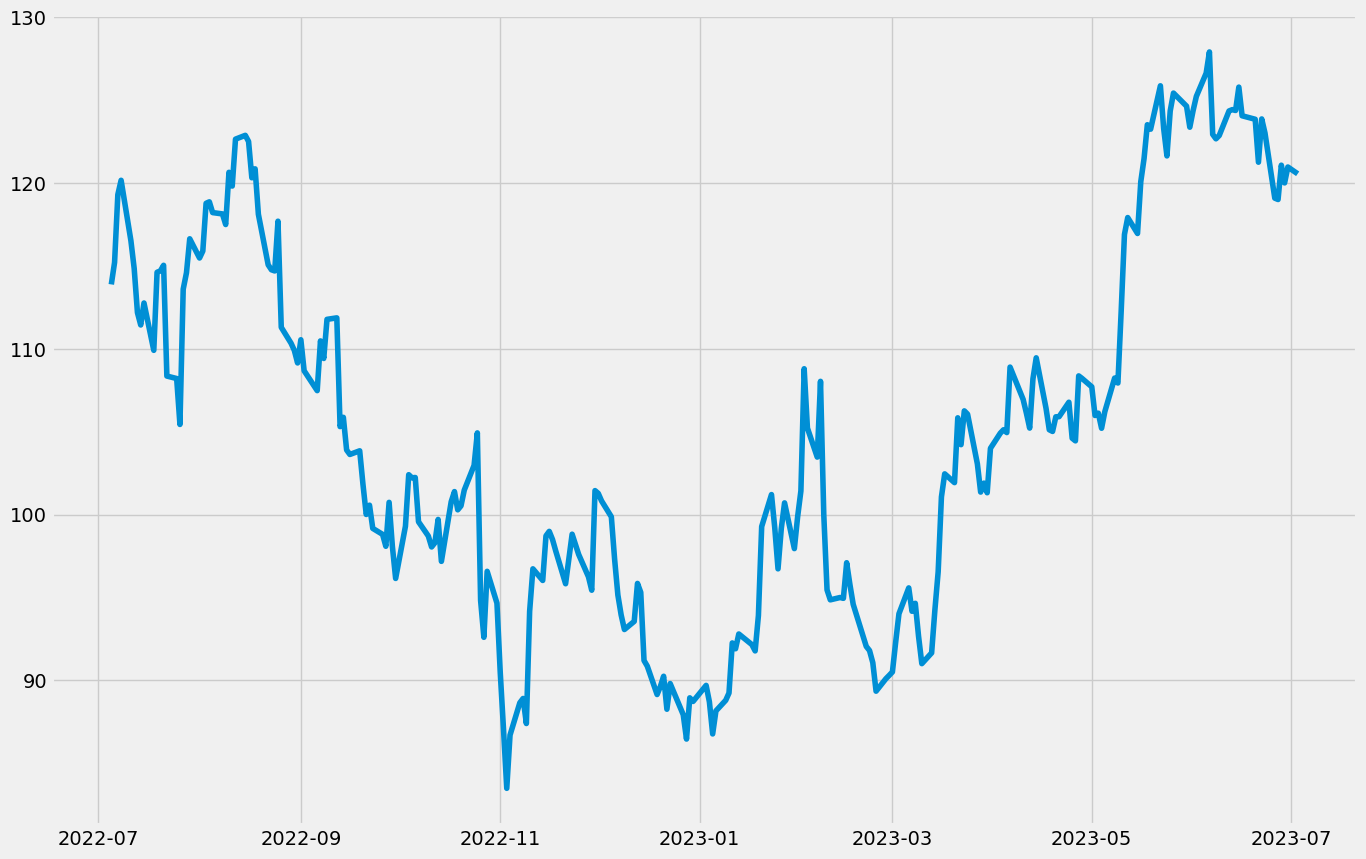

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

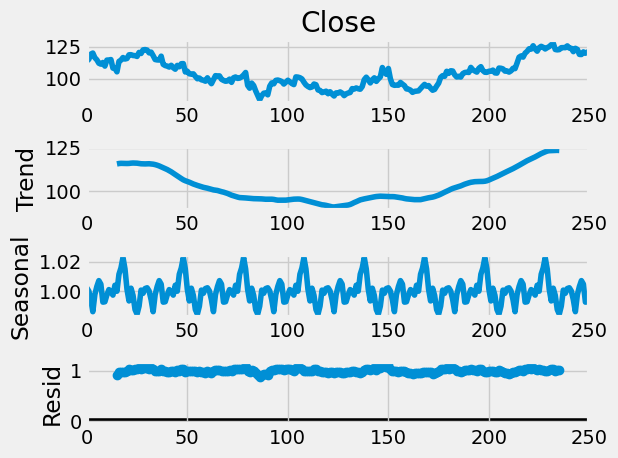

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

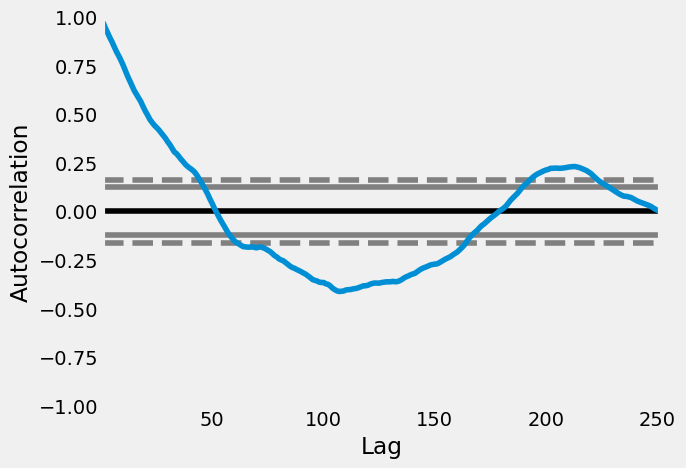

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


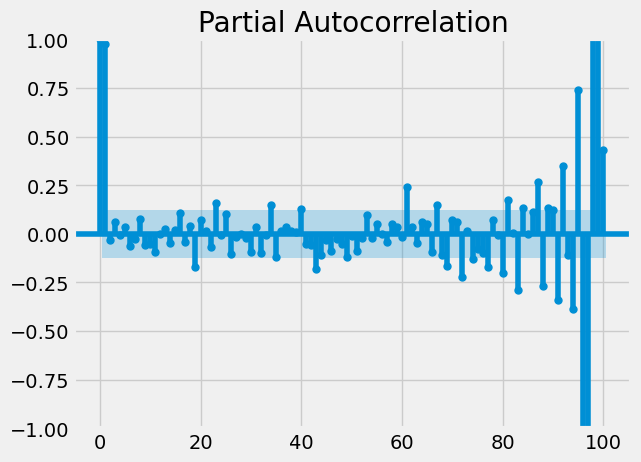

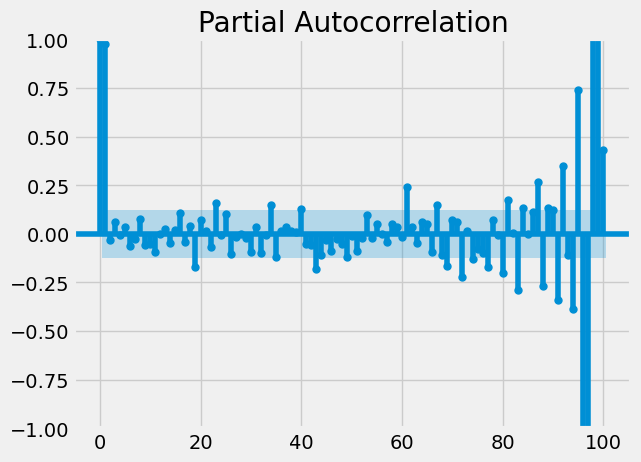

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [12]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()

print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -570.805
Date:                Wed, 05 Jul 2023   AIC                           1157.611
Time:                        16:23:51   BIC                           1185.782
Sample:                             0   HQIC                          1168.949
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0841      1.450      0.058      0.954      -2.758       2.927
ar.L2          0.7106      1.485      0.478      0.632      -2.201       3.622
ar.L3         -0.0221      0.163     -0.136      0.8

In [13]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      113.887002
2      115.215873
3      119.190918
4      119.748882
          ...    
246    119.066508
247    119.407981
248    121.151201
249    119.837587
250    121.016863
Name: predicted_mean, Length: 251, dtype: float64


In [14]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -556.532
Date:                            Wed, 05 Jul 2023   AIC                           1143.065
Time:                                    16:25:37   BIC                           1195.149
Sample:                                         0   HQIC                          1164.056
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1885      0.395     -0.477      0.633      -0.963       0.586
ar.L2         -0.7698      0.378   

In [15]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    121.499750
252    122.043482
253    122.720445
254    122.409048
255    121.722048
256    120.979876
257    121.222904
258    121.877894
259    122.243306
260    122.759326
261    123.000898
Name: predicted_mean, dtype: float64


<Axes: >

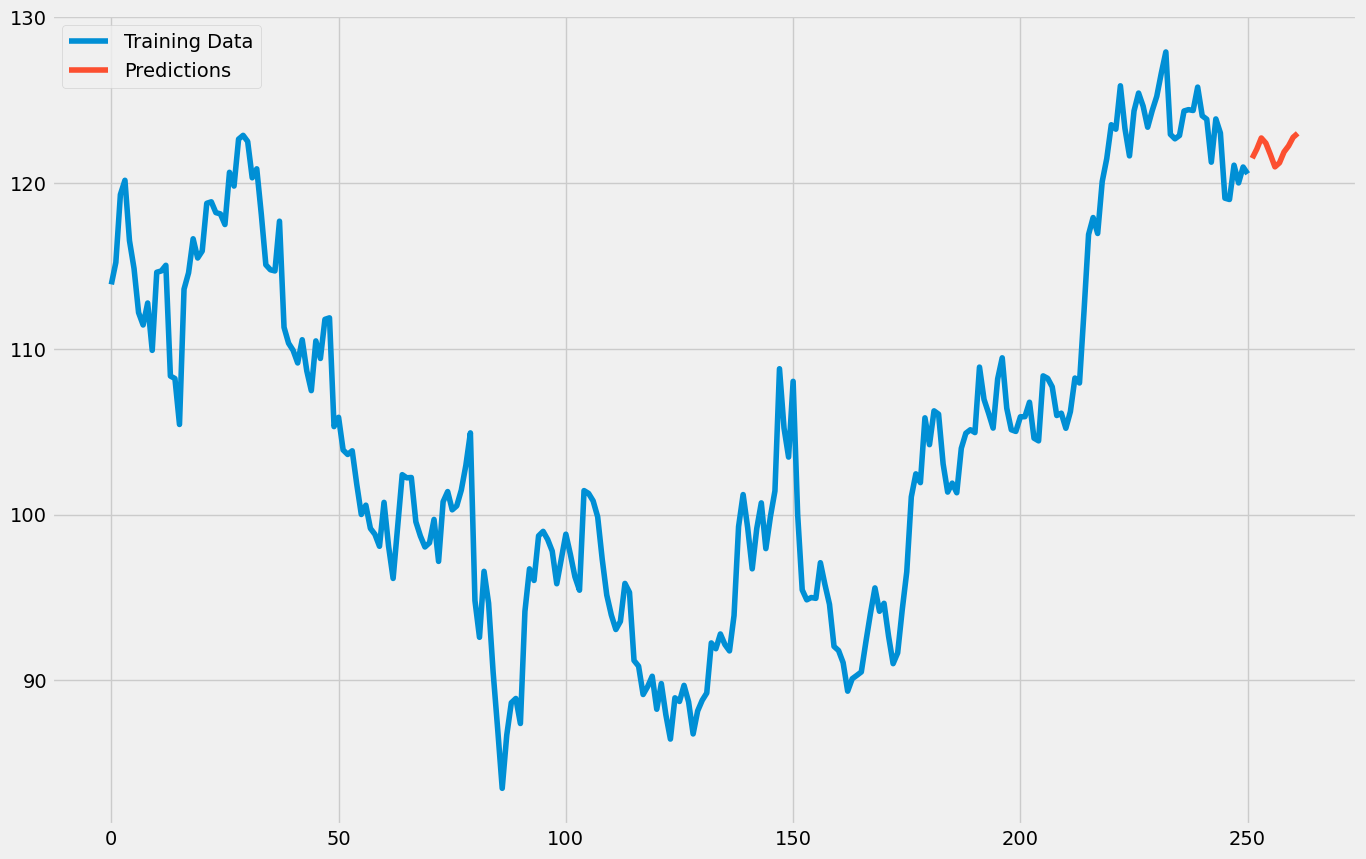

In [16]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")